# Ordinary Differential Equations (ODEs)

## Introduction

ODEs exhibit rich and fascinating behaviour, and much of this behaviour is accessible only through numerical simulation. 
This week we focus exclusively on developing Python code to examine such behaviour. By the end of this week's notebooks you will be able to play with and study interesting solutions of ODEs

---

Consider the system of ODEs

$$
\dot y = \frac{dy}{dt} = f(y,t), \label{eq:ODE1}\tag{1}
$$

where $y \in \mathbb R^n$ and $f:\mathbb R^{n+1} \rightarrow \mathbb R^n$. The notation differs slightly from that used in MA133, but it is common in [numerical approaches](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) where $y$ is used for the dependent variable. We will not use bold face, but you should understand that in general $y$ is a vector of dependent variables and $f$ a vector valued function. Hence, it is understood that we are considering [systems of ODEs](https://en.wikipedia.org/wiki/Ordinary_differential_equation#System_of_ODEs), as discussed in Chapter 4 of the MA133 notes. (Note: We are not going to assume that you remember everything from ODEs, but it might helpful to recall Sec. 4.1 and the concept of phase portrait from Sec. 4.4.)

We frequently refer to $f$ as the right-hand-side (RHS). It is of course what defines the particular ODE of interest. We have in mind that $f$ will be some function specified by the user (you). 

We are interested in the *Initial Value Problem*: the initial condition $y(t_0) = y_0$ is specified at some time $t_0$ and we seek the solution $y(t)$ from $t_0$ to some final time $t_f$.  In fact we are going to make our lives easier from the outset and always take $t_0=0$ in everything we write in these notebooks. Given that (\ref{eq:ODE1}) is non-autonomous if $f$ varies with $t$, this is not an arbitrary choice. It is not so hard to generalise to arbitrary initial times by introducing a parameter $t_0 \ne 0$. You can do this later on your own. We want to keep things simple. 



In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

---

## Euler's method

#### Time grid

We start by discretising time, that is dividing our total time interval $[0, t_f]$ into $N$ sub-intervals of equal size. 
Specifically, we consider a time grid $t_0 = 0, t_1, t_2, \cdots, t_n, \cdots, t_N = t_f$, where $t_n = n\Delta t$. $\Delta t$ is known as the time step. Note that there are $N+1$ grid points in time corresponding to $N$ time steps of size $\Delta t$.  Many authors use $h$ for the time step, but we will stick to $\Delta t$.

In our Python code we will use
- `dt` for the time step $\Delta t$, 
- `Nsteps` for the number of time steps $N$. 

**Exercise:** In the cell below, insert a line that uses `tf` and `Nsteps` to create a time grid using `t = np.linspace(...)`

In [10]:
tf = 5
Nsteps = 50
t = np.linspace(0,5,Nsteps+1, retstep = True)
print("dt is ",t[1])

dt is  0.1


Now re-edit the cell to return the time step as well, `t, dt = np.linspace( ..., retstep = True)`. Print the time step. I am guessing that you forgot exactly how to return the `dt`. In the future you will need to look these things up, but not right now. Your time step will be simple if you remembered that our grids have $N+1$ points, not $N$. 
If you have any questions about the answer, skim the code later in the notebook or just wait. 

Our goal is to approximate $y(t)$ on our time grid, $t_0, t_1, \cdots, t_n \cdots t_N$. We let $y_n$ denote our numerical approximation to the true solution $y(t_n)$. 

**Exercise:** Initially assume we are interested in a one-variable ODE: $y \in \mathbb R$. In the cell below, insert a line that creates a 1D array `y` of length `Nsteps+1` with all zeros.  

In [11]:
y = np.zeros(Nsteps)

This will be our solution array. We will replace the zeros in this array with our numerical solution. 

---

#### Euler time stepping

You will agree that 

$$
\frac{dy}{dt}(t) \simeq \frac{y(t+\Delta t) - y(t)}{\Delta t} 
$$

We use this to approximate the derivative $\displaystyle{\frac{dy}{dt}}$ on the left-hand-side of our ODE (1)

$$
\frac{y(t+\Delta t) - y(t)}{\Delta t} \simeq f(y(t),t)
$$

and solving for $y(t+\Delta t)$

$$
y(t+\Delta t) \simeq  y(t) + \Delta t f(y(t),t)
$$

*Euler time stepping* is obtained by replacing the true solution $y(t_n)$ by the numerical approximation $y_n$, and dropping the approximately equals sign

$$
y_{n+1} = y_n + \Delta t  f(y_n, t_n) \label{eq:Euler}\tag{2}
$$

This is a rule for going from $y_n$ to $y_{n+1}$, a process known as taking one time step. Euler time stepping is in fact the simplest possible rule consistent with the ODE. 

We assume that we are told the initial condition. Hence we know $y_0$. We can simply repeatedly apply the Euler time stepping to find our approximate solution $y_n$ at later times. 

---

## A first ODE solver

Below is a complete Python code for solving the linear, one-variable ODE 

$$
\dot y = -\mu y
$$

by Euler time stepping. $\mu$ is a parameter. The numerical solution and true solution are plotted. You can read and easily understand how it works given the previous discussion. Two comments:
- We use variable `y0` for the initial condition. After the solution array `y` is created, we initialise this array with `y[0]=y0`. This helps keep the problem specification, including the setting if the initial condition, separate from the construction of the numerical solution.

- The variable `ydot` might appear to be unnecessary, but it is useful to keep the ODE specific parts of the code separate from the numerical-method specific parts of the code (the Euler time step). Later, we will compute `ydot` using functions.  

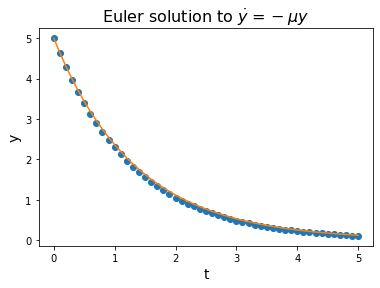

In [27]:
# Solve the ODE: dot y = -mu y, by Euler time stepping,
# and plot the numerical and true solutions.

# Problem setup. 
# Set model and numerical parameters, and the initial condition.
# These are the lines the user might want to vary.
tf = 5
Nsteps = 50
mu = 0.75
y0 = 5

# Generate the time grid and solution array
t, dt = np.linspace(0, tf, Nsteps+1, retstep=True)
y = np.zeros(Nsteps+1)

# Set the first point in the solution array to the initial condition
y[0] = y0
    
# Euler time-stepping loop:
for n in range(Nsteps):
    ydot = -mu * y[n]
    y[n+1] = y[n] + dt * ydot
        
# plot the numerical solution
plt.plot(t, y, 'o')

# plot the true solution
y_true = y0*np.exp(-mu*t)
plt.plot(t, y_true)

# labels etc
plt.xlabel("t", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Euler solution to $\dot y = -\mu y$", fontsize=16)

plt.show()

While the numerical solution is not very exciting, it is reasonably accurate. 

---
# Exercise

1. Play with the parameters in the above code. Specifically change the value of `mu` and change the number of times `Nsteps` to 20 or fewer. Unsurprisingly the solution gets worse in general.


---